In [2]:
import json
import re
from statistics import mean
import matplotlib.pyplot as plt

In [1]:
#only for google colab uses, to access the files
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive

Mounted at /content/drive/
/content/drive/My Drive


In [3]:
#gold data as a dict with only audio name and transcription
def process_json_gold_data(path):

    with open(path, 'r') as file:
        data = json.load(file)

    # match the pattern and only keep the name of the video
    pattern = re.compile(r'(\d+_\d+).MP4')

    #store the results
    result = {}

    # Iterate through the items and apply the regex
    for item in data:
        video_path = item.get("video_path", "")
        match = pattern.search(video_path)
        if match:
            # construct the new key with .wav to correspond to the audio files
            new_key = match.group(1) + ".wav"
            # Assign transcription as values
            result[new_key] = item.get("transcription_timestamp", "")

    return result

# Function to calculate the arithmetic mean of 'tiny_wer' and 'small_wer' from a JSON file
def calculate_wer_means(filename):
    # Read the JSON file and load it into a dictionary
    with open(filename, 'r') as file:
        data = json.load(file)

    # Extract all 'tiny_wer' and 'small_wer' values
    tiny_wer_values = [details['tiny_wer'] for details in data.values()]
    small_wer_values = [details['small_wer'] for details in data.values()]

    # Calculate the arithmetic means
    tiny_wer_mean = mean(tiny_wer_values)
    small_wer_mean = mean(small_wer_values)

    return tiny_wer_mean, small_wer_mean

# Function to plot WER comparison for Tiny and Small models from two dictionaries
def plot_wer_comparison(dict1, dict2, title1='Dictionary 1', title2='Dictionary 2'):
    labels = list(dict1.keys())[1:]
    tiny_wer1 = [values[0] for values in dict1.values()]
    tiny_wer1 = tiny_wer1[1:]
    tiny_wer2 = [values[0] for values in dict2.values()]
    tiny_wer2 = tiny_wer2[1:]

    small_wer1 = [values[1] for values in dict1.values()]
    small_wer1 = small_wer1[1:]
    small_wer2 = [values[1] for values in dict2.values()]
    small_wer2 = small_wer2[1:]

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Plot for Tiny models
    axes[0].plot(labels, tiny_wer1, label=f'{title1} Tiny Model', marker='o')
    axes[0].plot(labels, tiny_wer2, label=f'{title2} Tiny Model', marker='x')
    axes[0].axhline(y=dict1['original_transcriptions'][0], color='red', linestyle='--')
    axes[0].set_title('Tiny Model WER Comparison')
    axes[0].set_xlabel('Noise Type')
    axes[0].set_ylabel('Word Error Rate (WER)')
    axes[0].legend()
    axes[0].grid(True)
    axes[0].tick_params(labelrotation=45)

    # Plot for Small models
    axes[1].plot(labels, small_wer1, label=f'{title1} Small Model', marker='o')
    axes[1].plot(labels, small_wer2, label=f'{title2} Small Model', marker='x')
    axes[1].axhline(y=dict1['original_transcriptions'][1], color='red', linestyle='--')
    axes[1].set_title('Small Model WER Comparison')
    axes[1].set_xlabel('Noise Type')
    axes[1].set_ylabel('Word Error Rate (WER)')
    axes[1].legend()
    axes[1].grid(True)
    axes[1].tick_params(labelrotation=45)

    # Adjust the layout
    plt.tight_layout()
    plt.show()

def create_separate_box_plots(data_dict_10db, data_dict_0db):
    # Extracting Tiny and Small WER values for 10dB SNR and 0dB SNR
    original_tiny = [v[0] for v in data_dict_10db.values()][0]
    original_small =  [v[1] for v in data_dict_10db.values()][0]
    tiny_wer_10db = [v[0] for v in data_dict_10db.values()][1:]
    small_wer_10db = [v[1] for v in data_dict_10db.values()][1:]
    tiny_wer_0db = [v[0] for v in data_dict_0db.values()][1:]
    small_wer_0db = [v[1] for v in data_dict_0db.values()][1:]

    # Combining data for box plots
    data_tiny = [tiny_wer_10db, tiny_wer_0db]
    data_small = [small_wer_10db, small_wer_0db]

    # Creating the box plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot for Tiny model
    axes[0].boxplot(data_tiny, labels=['10dB SNR', '0dB SNR'])
    axes[0].axhline(y=original_tiny, color='red', linestyle='--')
    axes[0].set_title('Box Plot of WER for Tiny Model')
    axes[0].set_ylabel('Word Error Rate (WER)')
    axes[0].set_xticks([1, 2], ['10dB SNR', '0dB SNR'])

    # Box plot for Small model
    axes[1].boxplot(data_small, labels=['10dB SNR', '0dB SNR'])
    axes[1].axhline(y=original_small, color='red', linestyle='--')
    axes[1].set_title('Box Plot of WER for Small Model')
    axes[1].set_ylabel('Word Error Rate (WER)')
    axes[1].set_xticks([1, 2], ['10dB SNR', '0dB SNR'])

    plt.tight_layout()
    plt.show()


In [4]:
gold_data = process_json_gold_data('/content/drive/My Drive/gold/cleaned_transcriptions.json')

categories = ('original_transcriptions', 'cat', 'chainsaw', 'crickets', 'crying_baby', 'engine', 'glass_breaking', 'helicopter', 'keyboard_typing', 'laughing', 'vacuum_cleaner')
SNR_10db = {}
SNR_0db = {}


for cat in categories:
    SNR_0db[cat]= calculate_wer_means(f'/content/drive/My Drive/WERs/WERs_0dbSNR/wer_{cat}.json')



for cat in categories:
    SNR_10db[cat]= calculate_wer_means(f'/content/drive/My Drive/WERs/WERs_10dbSNR/wer_{cat}.json')


print(SNR_10db)
print(SNR_0db)

{'original_transcriptions': (0.3441453995886726, 0.3093357587677546), 'cat': (0.34177152614173506, 0.30983352489052074), 'chainsaw': (0.3462905214270462, 0.30849805480505066), 'crickets': (0.3454042228508712, 0.3102463065533024), 'crying_baby': (0.3434909045222013, 0.3092993368563327), 'engine': (0.3784358011370782, 0.3082900188450932), 'glass_breaking': (0.40874875406409056, 0.29100910670194613), 'helicopter': (0.4363509958589684, 0.3084696155634216), 'keyboard_typing': (0.3712326399762779, 0.33621336199437724), 'laughing': (0.4097435176286729, 0.3187636621891275), 'vacuum_cleaner': (0.47227292687102856, 0.3379665687654406)}
{'original_transcriptions': (0.3441453995886726, 0.3093357587677546), 'cat': (0.46530480732160157, 0.32938837049533437), 'chainsaw': (0.8150546004478594, 0.5432472564401448), 'crickets': (0.6048223247475419, 0.37517104491472875), 'crying_baby': (0.6600574426829464, 0.39258185758271863), 'engine': (0.5115675599349435, 0.32901799376054575), 'glass_breaking': (0.4763

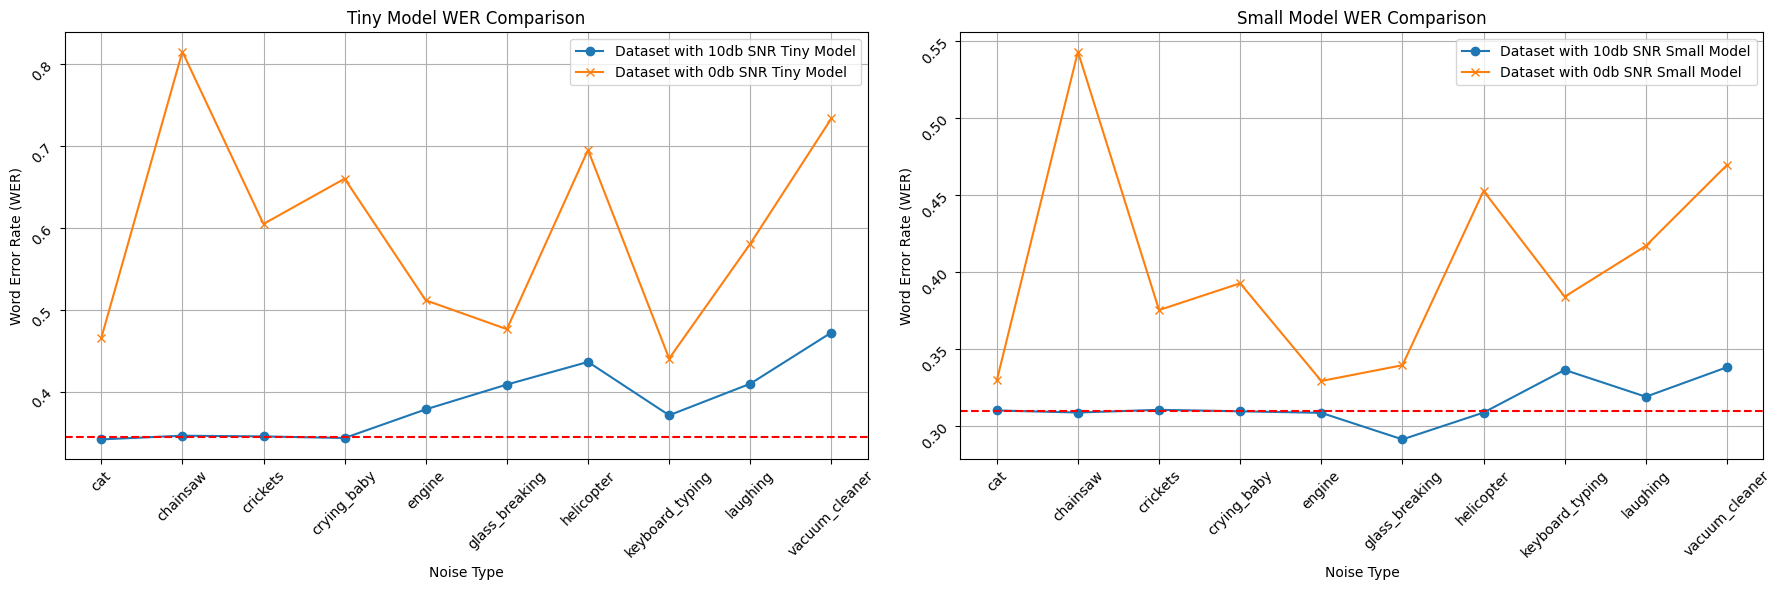

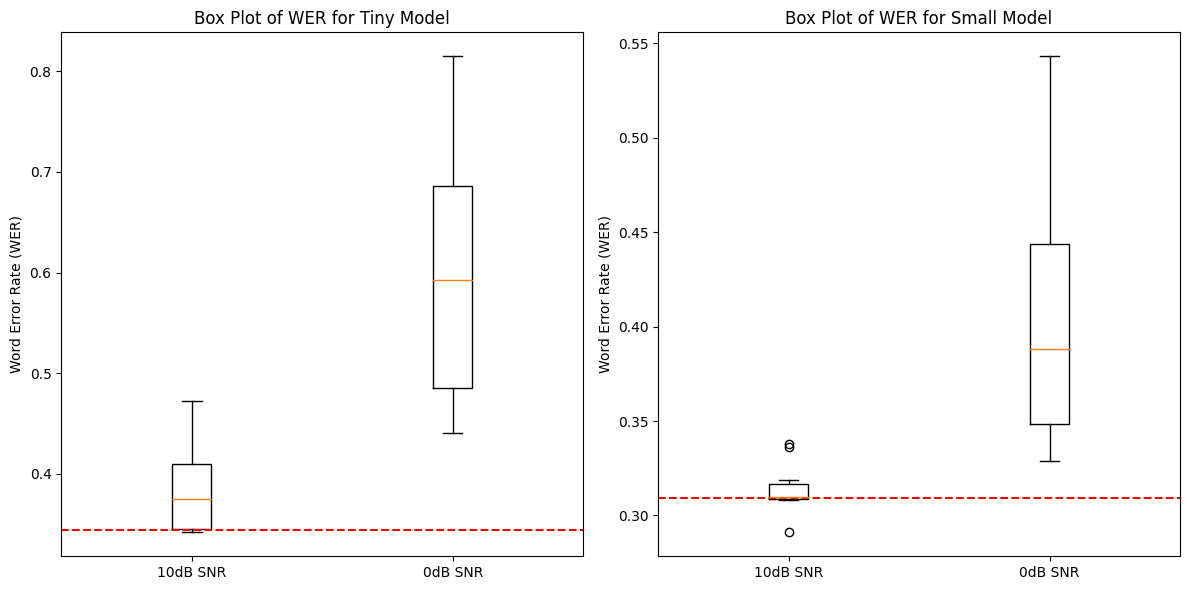

In [5]:
plot_wer_comparison(SNR_10db, SNR_0db, 'Dataset with 10db SNR', 'Dataset with 0db SNR')
create_separate_box_plots(SNR_10db, SNR_0db)